Algo de código extra para analizar el contenido del foro de Mumuki desde una perspectiva educativa/pedagógica.

In [3]:
from filterTools import csvFilter

tutors = csvFilter('db/messages.csv', lambda msg: msg['from_moderator'] == 'True', saveField='sender_uid')

empty_discs = csvFilter('db/discussions.csv', lambda disc: not disc['description'], saveField='id')
print(f"Discusiones vacías: {len(empty_discs)}")

print(f"Discusiones vacías con mensajes de tutor: {len(csvFilter('db/messages.csv', lambda msg: msg['discussion_id'] in empty_discs and msg['sender_uid'] in tutors, saveField='discussion_id'))}")

short_discs = csvFilter('db/discussions.csv', lambda disc: len(disc['description']) < 100, saveField='id')
print(f"Discusiones cortas: {len(short_discs)}")

print(f"Discusiones cortas con mensajes de tutor: {len(csvFilter('db/messages.csv', lambda msg: msg['discussion_id'] in short_discs and msg['sender_uid'] in tutors, saveField='discussion_id'))}")


Discusiones vacías: 138
Discusiones vacías con mensajes de tutor: 107
Discusiones cortas: 8710
Discusiones cortas con mensajes de tutor: 7442


Métricas interesantes:

* Proporción de consultas con signo de pregunta.

In [2]:
from filterTools import csvFilter

tutors = csvFilter('db/messages.csv', lambda msg: msg['from_moderator'] == 'True', saveField='sender_uid')

print(f"Discusiones con signo de pregunta: {len(csvFilter('db/discussions.csv', lambda disc: '?' in disc['description']))}")

print(f"Mensajes de estudiantes: {len(csvFilter('db/messages-students.csv', lambda _: True))}")
print(f"Mensajes de tutores: {len(csvFilter('db/messages-tutors.csv', lambda _: True))}")
print(f"Mensajes interrogativos de estudiantes: {len(csvFilter('db/messages-students.csv', lambda msg: '?' in msg['content']))}")
print(f"Mensajes interrogativos de tutores: {len(csvFilter('db/messages-tutors.csv', lambda msg: '?' in msg['content']))}")

Discusiones con signo de pregunta: 3995
Mensajes de estudiantes: 14592
Mensajes de tutores: 13844
Mensajes interrogativos de estudiantes: 1441
Mensajes interrogativos de tutores: 8181


* Largo de mensajes y conversaciones en consultas con < 50 caracteres, < 100 caracters, > 100 caracteres.

Discusiones < 50: 4230
Discusiones < 100: 4480
Discusiones > 100: 3440
Discusiones > 200: 2116


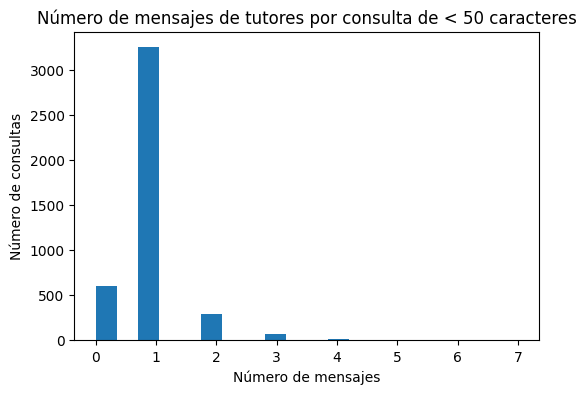

Promedio de mensajes: 0.98


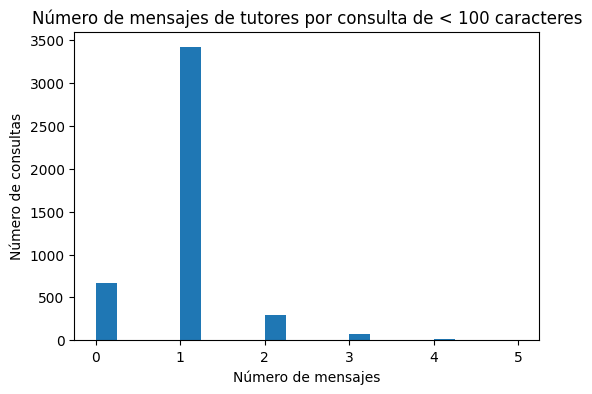

Promedio de mensajes: 0.961


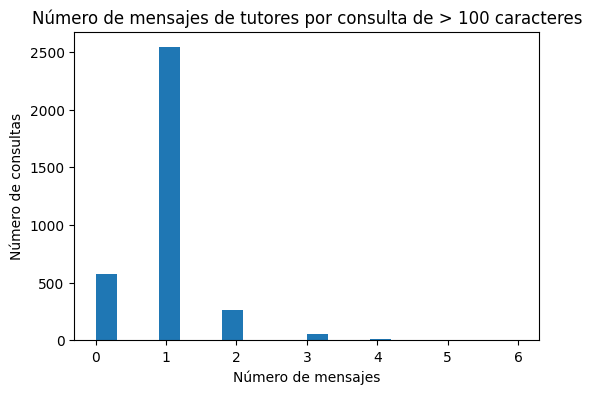

Promedio de mensajes: 0.951


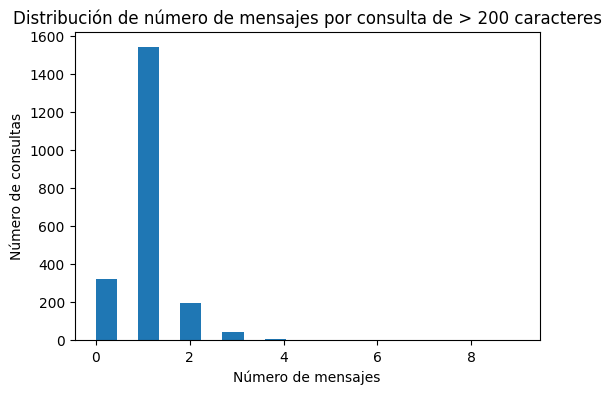

Promedio de mensajes: 1.003


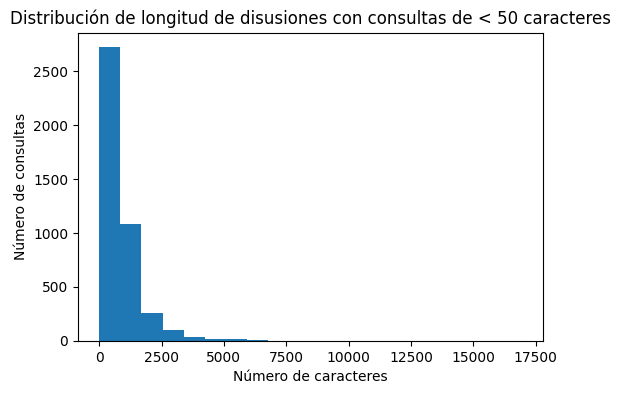

Promedio de caracteres: 862.126


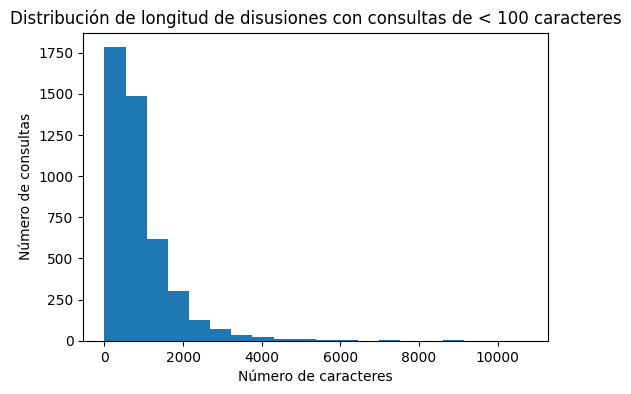

Promedio de caracteres: 897.296


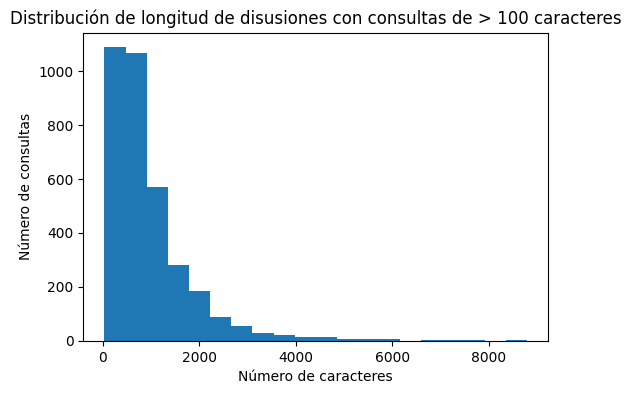

Promedio de caracteres: 958.328


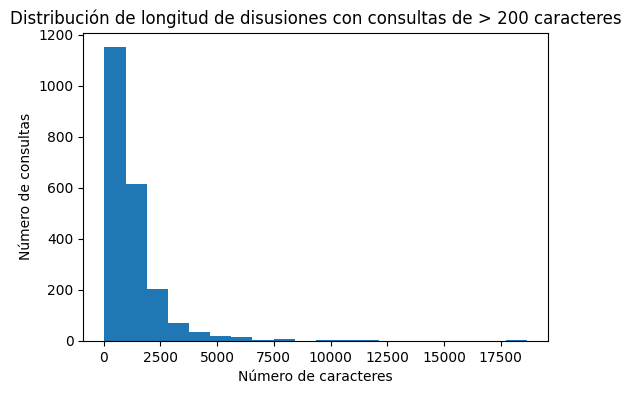

Promedio de caracteres: 1201.313


In [4]:
from filterTools import csvFilter
from functools import reduce
import matplotlib.pyplot as mlp
import numpy as np

tutors = csvFilter('db/messages.csv', lambda msg: msg['from_moderator'] == 'True', saveField='sender_uid')

discs50 = csvFilter('db/discussions.csv', lambda disc: len(disc['description']) < 50, write=True, tag='-50', saveField='id')
discs100 = csvFilter('db/discussions.csv', lambda disc: 50 <= len(disc['description']) < 100, write=True, tag='-100', saveField='id')
discsLong = csvFilter('db/discussions.csv', lambda disc: 100 <= len(disc['description']) < 200, write=True, tag='-long', saveField='id')
discsVeryLong = csvFilter('db/discussions.csv', lambda disc: len(disc['description']) >= 200, write=True, tag='-verylong', saveField='id')

print(f'Discusiones < 50: {len(discs50)}')
print(f'Discusiones < 100: {len(discs100)}')
print(f'Discusiones > 100: {len(discsLong)}')
print(f'Discusiones > 200: {len(discsVeryLong)}')

msgs = csvFilter('db/messages.csv', lambda _: True)

discs50_msgCount = [reduce(lambda count, msg: count + 1 if msg['discussion_id'] == disc_id else count, msgs, 0) for disc_id in discs50]
discs100_msgCount = [reduce(lambda count, msg: count + 1 if msg['discussion_id'] == disc_id else count, msgs, 0) for disc_id in discs100]
discsLong_msgCount = [reduce(lambda count, msg: count + 1 if msg['discussion_id'] == disc_id else count, msgs, 0) for disc_id in discsLong]
discsVeryLong_msgCount = [reduce(lambda count, msg: count + 1 if msg['discussion_id'] == disc_id else count, msgs, 0) for disc_id in discsVeryLong]

mlp.rcParams['figure.figsize'] = [6, 4]

mlp.title("Número de mensajes de tutores por consulta de < 50 caracteres")
mlp.xlabel('Número de mensajes')
mlp.ylabel('Número de consultas')
mlp.hist(discs50_msgCount, bins=20)
mlp.show()
print(f'Promedio de mensajes: {round(np.mean(discs50_msgCount), 3)}')

mlp.title("Número de mensajes de tutores por consulta de < 100 caracteres")
mlp.xlabel('Número de mensajes')
mlp.ylabel('Número de consultas')
mlp.hist(discs100_msgCount, bins=20)
mlp.show()
print(f'Promedio de mensajes: {round(np.mean(discs100_msgCount), 3)}')

mlp.title("Número de mensajes de tutores por consulta de > 100 caracteres")
mlp.xlabel('Número de mensajes')
mlp.ylabel('Número de consultas')
mlp.hist(discsLong_msgCount, bins=20)
mlp.show()
print(f'Promedio de mensajes: {round(np.mean(discsLong_msgCount), 3)}')

mlp.title("Distribución de número de mensajes por consulta de > 200 caracteres")
mlp.xlabel('Número de mensajes')
mlp.ylabel('Número de consultas')
mlp.hist(discsVeryLong_msgCount, bins=20)
mlp.show()
print(f'Promedio de mensajes: {round(np.mean(discsVeryLong_msgCount), 3)}')

discs50_length = [len(reduce(lambda text, msg: text + ' ' + msg['content'] if msg['discussion_id'] == disc_id else text, msgs, '')) for disc_id in discs50]
discs100_length = [len(reduce(lambda text, msg: text + ' ' + msg['content'] if msg['discussion_id'] == disc_id else text, msgs, '')) for disc_id in discs100]
discsLong_length = [len(reduce(lambda text, msg: text + ' ' + msg['content'] if msg['discussion_id'] == disc_id else text, msgs, '')) for disc_id in discsLong]
discsVeryLong_length = [len(reduce(lambda text, msg: text + ' ' + msg['content'] if msg['discussion_id'] == disc_id else text, msgs, '')) for disc_id in discsVeryLong]

mlp.title("Distribución de longitud de disusiones con consultas de < 50 caracteres")
mlp.xlabel('Número de caracteres')
mlp.ylabel('Número de consultas')
mlp.hist(discs50_length, bins=20)
mlp.show()
print(f'Promedio de caracteres: {round(np.mean(discs50_length), 3)}')

mlp.title("Distribución de longitud de disusiones con consultas de < 100 caracteres")
mlp.xlabel('Número de caracteres')
mlp.ylabel('Número de consultas')
mlp.hist(discs100_length, bins=20)
mlp.show()
print(f'Promedio de caracteres: {round(np.mean(discs100_length), 3)}')

mlp.title("Distribución de longitud de disusiones con consultas de > 100 caracteres")
mlp.xlabel('Número de caracteres')
mlp.ylabel('Número de consultas')
mlp.hist(discsLong_length, bins=20)
mlp.show()
print(f'Promedio de caracteres: {round(np.mean(discsLong_length), 3)}')

mlp.title("Distribución de longitud de disusiones con consultas de > 200 caracteres")
mlp.xlabel('Número de caracteres')
mlp.ylabel('Número de consultas')
mlp.hist(discsVeryLong_length, bins=20)
mlp.show()
print(f'Promedio de caracteres: {round(np.mean(discsVeryLong_length), 3)}')

In [5]:
from filterTools import csvFilter

print(f'Discusiones resueltas < 50: {len(csvFilter("db/discussions-50.csv", lambda disc: disc["status"] == "solved"))}')
print(f'Discusiones resueltas < 100: {len(csvFilter("db/discussions-100.csv", lambda disc: disc["status"] == "solved"))}')
print(f'Discusiones resueltas > 100: {len(csvFilter("db/discussions-long.csv", lambda disc: disc["status"] == "solved"))}')
print(f'Discusiones resueltas > 200: {len(csvFilter("db/discussions-verylong.csv", lambda disc: disc["status"] == "solved"))}')

Discusiones resueltas < 50: 1215
Discusiones resueltas < 100: 1319
Discusiones resueltas > 100: 1141
Discusiones resueltas > 200: 765


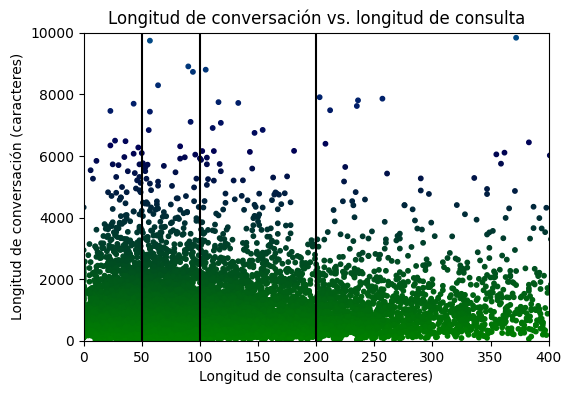

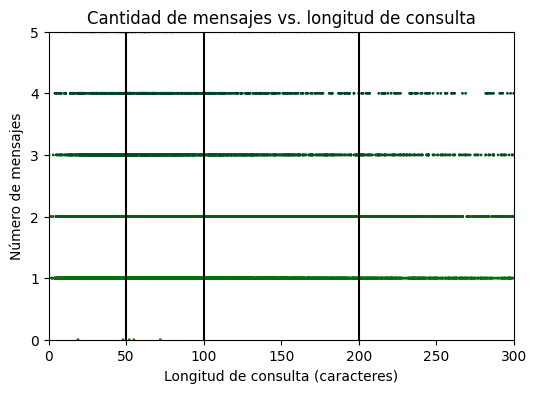

In [22]:
from filterTools import csvFilter
from functools import reduce
import matplotlib.pyplot as mlp

xlimit1 = 400
ylimit1 = 10000

discs = csvFilter('db/discussions.csv', lambda _: True)
msgs = csvFilter('db/messages.csv', lambda _: True)

mlp.rcParams['figure.figsize'] = [6, 4]

mlp.title("Longitud de conversación vs. longitud de consulta")
mlp.xlabel('Longitud de consulta (caracteres)')
mlp.ylabel('Longitud de conversación (caracteres)')
mlp.xlim(0, xlimit1)
mlp.ylim(0, ylimit1)
ydata1 = [len(reduce(lambda text, msg: text + ' ' + msg['content'] if msg['discussion_id'] == disc_id else text, msgs, '')) for disc_id in [disc['id'] for disc in discs]]
mlp.scatter([len(disc['description']) for disc in discs], ydata1, s=10, c=[y*100/ylimit1 for y in ydata1], cmap='ocean')
mlp.vlines(x = [50, 100, 200], ymin = 0, ymax = ylimit1, color = 'black')
mlp.show()

xlimit2 = 300
ylimit2 = 5

mlp.title("Cantidad de mensajes vs. longitud de consulta")
mlp.xlabel('Longitud de consulta (caracteres)')
mlp.ylabel('Número de mensajes')
mlp.xlim(0, xlimit2)
mlp.ylim(0, ylimit2)
ydata2 = [reduce(lambda count, msg: count + 1 if msg['discussion_id'] == disc_id else count, msgs, 0) for disc_id in [disc['id'] for disc in discs]]
mlp.scatter([len(disc['description']) for disc in discs], ydata2, s=1, c=[y*100/ylimit2 for y in ydata2], cmap='ocean')
mlp.vlines(x = [50, 100, 200], ymin = 0, ymax = ylimit2, color = 'black')
mlp.show()


Discusiones con mensajes de tutores: 12103


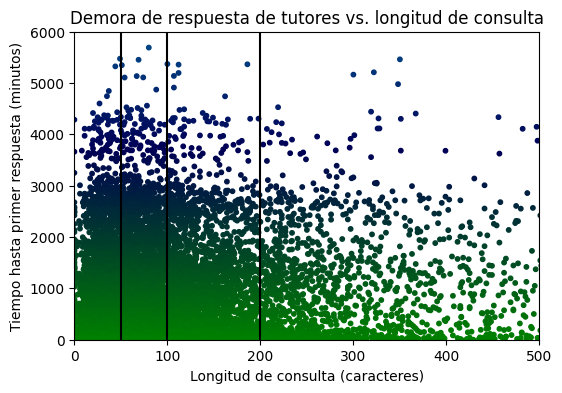

Promedio de demora discusiones < 50 (3634): 874.474
Promedio de demora discusiones < 100 (3808): 958.022
Promedio de demora discusiones < 200 (2867): 973.681
Promedio de demora discusiones > 200 (1794): 1040.846


In [38]:
from filterTools import csvFilter
from dataTools import build_chats, total_chats
from datetime import datetime
import matplotlib.pyplot as mlp
import numpy as np

dt_format_def = '%Y-%m-%d %H:%M:%S.%f'
tutors = [int(id) for id in csvFilter('db/messages.csv', lambda msg: msg['from_moderator'] == 'True', saveField='sender_uid')]

discs = csvFilter('db/discussions.csv', lambda _: True)
msgs = csvFilter('db/messages.csv', lambda _: True)

all_chats = build_chats(discs, msgs, use_ids=True, use_exs=True, approved_msgs=False, students_msgs=False, approved_ids=tutors, msg_info=True)

all_data = [[], []]
for ex_discs in all_chats.values():
    for disc_id, disc_msgs in ex_discs.items():
        disc = next(disc for disc in discs if disc['id'] == disc_id)
        msg = next(msg for msg in msgs if int(msg['id']) == disc_msgs[0]['ID'])

        all_data[0].append(len(disc['description']))
        date1 = datetime.strptime(disc['created_at'], dt_format_def)
        date2 = datetime.strptime(msg['created_at'], dt_format_def)
        diff = date2 - date1
        all_data[1].append(diff.total_seconds() / 60)

print(f'Discusiones con mensajes de tutores: {len(all_data[0])}')

xlimit = 500
ylimit = 6000
mlp.rcParams['figure.figsize'] = [6, 4]

mlp.title("Demora de respuesta de tutores vs. longitud de consulta")
mlp.xlabel('Longitud de consulta (caracteres)')
mlp.ylabel('Tiempo hasta primer respuesta (minutos)')
mlp.xlim(0, xlimit)
mlp.ylim(0, ylimit)
mlp.scatter(all_data[0], all_data[1], s=10, c=[y*100/ylimit for y in all_data[1]], cmap='ocean')
mlp.vlines(x = [50, 100, 200], ymin = 0, ymax = ylimit, color = 'black')
mlp.show()

discs50_ids = [idx for idx, long in enumerate(all_data[0]) if long < 50]
discs100_ids = [idx for idx, long in enumerate(all_data[0]) if 50 <= long < 100]
discs200_ids = [idx for idx, long in enumerate(all_data[0]) if 100 <= long < 200]
discslong_ids = [idx for idx, long in enumerate(all_data[0]) if long >= 200]

discs50_delays = [time for idx, time in enumerate(all_data[1]) if idx in discs50_ids]
discs100_delays = [time for idx, time in enumerate(all_data[1]) if idx in discs100_ids]
discs200_delays = [time for idx, time in enumerate(all_data[1]) if idx in discs200_ids]
discslong_delays = [time for idx, time in enumerate(all_data[1]) if idx in discslong_ids]

print(f'Promedio de demora discusiones < 50 ({len(discs50_delays)}): {round(np.mean(discs50_delays), 3)}')
print(f'Promedio de demora discusiones < 100 ({len(discs100_delays)}): {round(np.mean(discs100_delays), 3)}')
print(f'Promedio de demora discusiones < 200 ({len(discs200_delays)}): {round(np.mean(discs200_delays), 3)}')
print(f'Promedio de demora discusiones > 200 ({len(discslong_delays)}): {round(np.mean(discslong_delays), 3)}')